In [9]:
import numpy as np

# Function to generate a simple dataset
def generate_data(n_samples=1000, seq_length=10):
    X = np.random.randn(n_samples, seq_length, 1)  # Input sequences
    y = np.sum(X, axis=1)  # Targets (sum of each sequence)
    return X, y

# Generate the dataset
X, y = generate_data()


What Data is Being Generated?
Input Sequences (X):

X is a numpy array containing sequences of random numbers.
np.random.randn(n_samples, seq_length, 1) generates n_samples sequences, each of length seq_length, with each element being a random number drawn from a standard normal distribution (mean = 0, variance = 1).
Each sequence has one feature per time step, hence the shape is (n_samples, seq_length, 1).
Targets (y):

y is a numpy array containing the target values for each sequence.
np.sum(X, axis=1) computes the sum of the numbers in each sequence along the time axis (axis=1). This means for each sequence in X, the corresponding target in y is the sum of that sequence.
What Type of Problem Does This Data Represent?
This data represents a sequence prediction problem. Specifically, given a sequence of numbers, the task is to predict the sum of those numbers. This is a type of regression problem where the input is a sequence (a time series) and the output is a single continuous value.

Why This Data Helps Us Understand RNNs
Sequential Nature:

RNNs are designed to handle sequences of data. In this dataset, each input (X) is a sequence of numbers, making it an appropriate testbed for an RNN.
Learning Dependencies:

The model must learn to sum the numbers in each sequence to produce the correct output (y). This requires the RNN to effectively process and remember the values across the entire sequence, showcasing the RNN's ability to handle sequential dependencies.
Simplicity:

The task of summing numbers is simple and intuitive, making it easy to understand the underlying mechanics of the RNN without the complexity of more advanced tasks like language modeling or speech recognition.
Visual Representation of the Data
Consider a small example with n_samples = 3 and seq_length = 4:

Input Sequences (X):

X = [
     [[0.5], [1.2], [-0.3], [0.8]],    # Sequence 1
     [[-1.5], [0.7], [0.4], [-0.9]],   # Sequence 2
     [[1.0], [2.0], [3.0], [4.0]]      # Sequence 3
    ]
Targets (y):


 y = [2.2, -1.3, 10.0]
Here, y[0] is the sum of the first sequence: 
0.5
+
1.2
−
0.3
+
0.8
=
2.2
0.5+1.2−0.3+0.8=2.2.

Summary
This dataset is a simple yet effective way to demonstrate how RNNs can be used for sequence prediction tasks. By generating sequences of random numbers and their corresponding sums, we can train an RNN to learn the relationship between the sequence and its sum, thus providing a clear and straightforward introduction to the capabilities of RNNs.

In [10]:
X[10],y[10]

(array([[-0.63967536],
        [ 1.32859769],
        [ 0.42790104],
        [ 1.60101057],
        [ 2.34764171],
        [-1.22802545],
        [ 1.70819364],
        [-0.44116034],
        [ 0.64591117],
        [-0.59319825]]),
 array([5.15719642]))

In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the RNN model
model = Sequential([
    SimpleRNN(units=10, input_shape=(X_train.shape[1], X_train.shape[2])),  # RNN layer with 10 units
    Dense(1)  # Output layer (predicting a single value)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Use mean squared error for regression

# Print model summary
model.summary()


f:\anaconda\envs\My_p_and_R\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 10.2777 - val_loss: 8.1517
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.6498 - val_loss: 7.2115
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.0291 - val_loss: 5.6030
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.1301 - val_loss: 4.1006
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.8017 - val_loss: 3.3833
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.9424 - val_loss: 2.9506
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 3.1884 - val_loss: 2.6250
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.8701 - val_loss: 2.3997
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.6908 - val_loss: 2.1668
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.3999 - val_loss: 2.0086
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.1342 - val_loss: 1.8273
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2100  
Test Loss: 0.22205011546611786


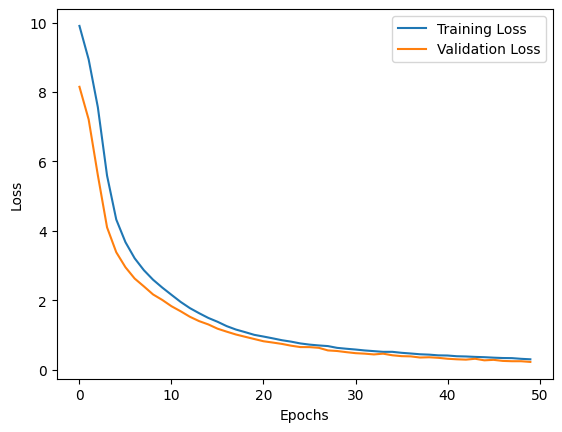

In [14]:
import matplotlib.pyplot as plt

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
